In [ ]:
#%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, f1_score
from lightgbm import LGBMClassifier

from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced

import itertools
import scipy.stats as ss

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
data = pd.read_csv('C:/Jiwon/data/tic2000.csv')

In [ ]:
data

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9817,33,1,2,4,8,0,7,2,0,5,...,0,0,0,1,0,0,0,0,0,0
9818,24,1,2,3,5,1,5,1,3,4,...,0,0,0,1,0,0,0,0,0,1
9819,36,1,2,3,8,1,5,1,3,7,...,0,0,0,1,0,0,0,1,0,0
9820,33,1,3,3,8,1,4,2,3,7,...,0,0,0,0,0,0,0,0,0,0


* EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 86 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   MOSTYPE   9822 non-null   int64
 1   MAANTHUI  9822 non-null   int64
 2   MGEMOMV   9822 non-null   int64
 3   MGEMLEEF  9822 non-null   int64
 4   MOSHOOFD  9822 non-null   int64
 5   MGODRK    9822 non-null   int64
 6   MGODPR    9822 non-null   int64
 7   MGODOV    9822 non-null   int64
 8   MGODGE    9822 non-null   int64
 9   MRELGE    9822 non-null   int64
 10  MRELSA    9822 non-null   int64
 11  MRELOV    9822 non-null   int64
 12  MFALLEEN  9822 non-null   int64
 13  MFGEKIND  9822 non-null   int64
 14  MFWEKIND  9822 non-null   int64
 15  MOPLHOOG  9822 non-null   int64
 16  MOPLMIDD  9822 non-null   int64
 17  MOPLLAAG  9822 non-null   int64
 18  MBERHOOG  9822 non-null   int64
 19  MBERZELF  9822 non-null   int64
 20  MBERBOER  9822 non-null   int64
 21  MBERMIDD  9822 non-null   int64
 22  

In [ ]:
data.CARAVAN.value_counts()

0    9236
1     586
Name: CARAVAN, dtype: int64

In [ ]:
data44 = data.iloc[:,43:64]

In [ ]:
data45 = pd.concat([data44,data.iloc[:,85]],axis = 1)

In [ ]:
#44-64 + 종속변수 CARAVAN
data45

,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,...,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,CARAVAN
0,0,0,0,6,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
2,2,0,0,6,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
3,0,0,0,6,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9817,2,0,0,6,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
9818,0,0,0,6,0,0,0,0,0,0,...,0,0,0,4,0,0,0,0,0,1
9819,0,0,0,6,0,0,0,0,0,0,...,0,0,0,3,0,0,0,1,0,0
9820,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

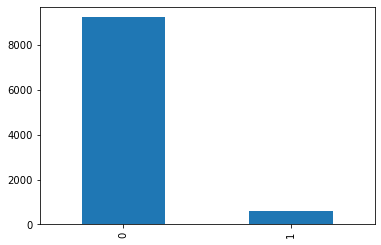

In [ ]:
data45['CARAVAN'].value_counts().plot(kind = 'bar')
# 불균형

In [ ]:
data0 = data45[data45['CARAVAN'] == 0]
data1 = data45[data45['CARAVAN'] == 1]

In [ ]:
data0

,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,...,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,CARAVAN
0,0,0,0,6,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
2,2,0,0,6,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
3,0,0,0,6,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9816,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9817,2,0,0,6,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
9819,0,0,0,6,0,0,0,0,0,0,...,0,0,0,3,0,0,0,1,0,0
9820,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data1

,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,...,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,CARAVAN
41,2,0,0,6,0,0,0,0,0,0,...,0,0,0,4,0,0,1,0,0,1
45,2,0,0,6,0,5,0,0,0,0,...,0,0,0,3,0,0,0,0,0,1
57,2,0,0,0,0,0,0,0,0,0,...,0,0,6,4,0,0,0,0,0,1
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,0,0,0,1
9764,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9810,2,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,0,2,0,1


Text(0.5, 1.0, 'PWAPART in CARAVAN = 1')

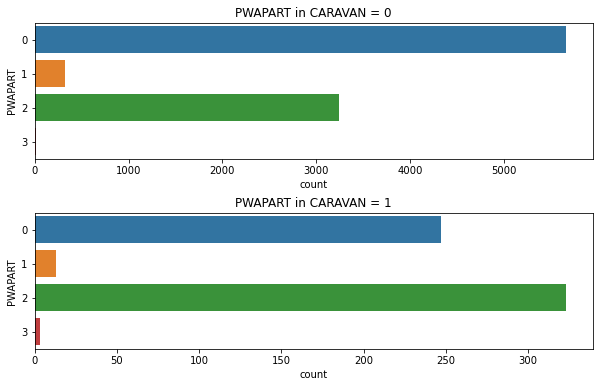

In [ ]:
#44
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="PWAPART", data = data0)
plt.title("PWAPART in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="PWAPART", data = data1)
plt.title("PWAPART in CARAVAN = 1")

Text(0.5, 1.0, 'PWABEDR in CARAVAN = 1')

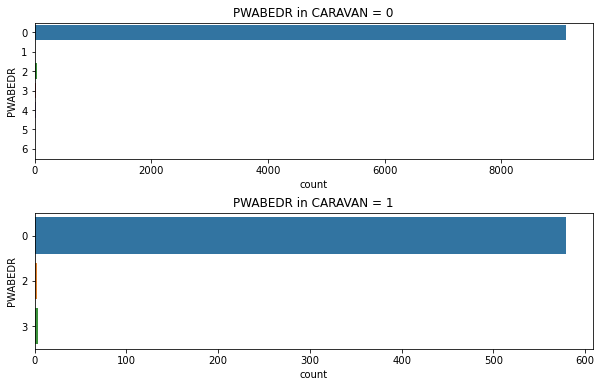

In [ ]:
#45
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="PWABEDR", data = data0)
plt.title("PWABEDR in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="PWABEDR", data = data1)
plt.title("PWABEDR in CARAVAN = 1")

Text(0.5, 1.0, 'PWALAND in CARAVAN = 1')

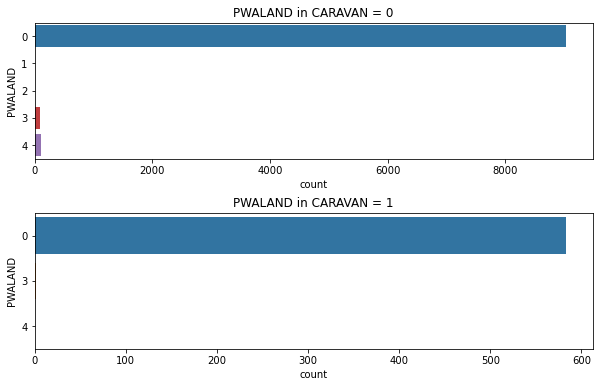

In [ ]:
#46
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="PWALAND", data = data0)
plt.title("PWALAND in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="PWALAND", data = data1)
plt.title("PWALAND in CARAVAN = 1")

Text(0.5, 1.0, 'PPERSAUT in CARAVAN = 1')

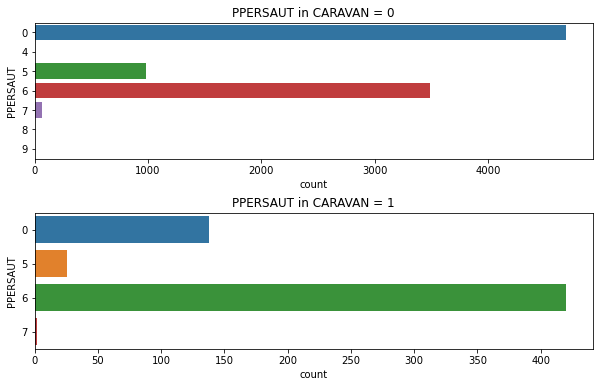

In [ ]:
#47
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="PPERSAUT", data = data0)
plt.title("PPERSAUT in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="PPERSAUT", data = data1)
plt.title("PPERSAUT in CARAVAN = 1")

Text(0.5, 1.0, 'PBESAUT in CARAVAN = 1')

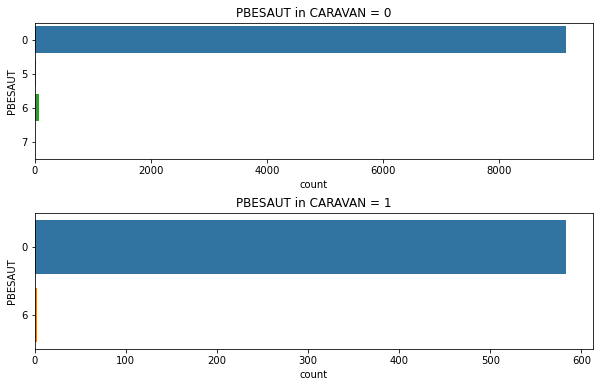

In [ ]:
#48
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="PBESAUT", data = data0)
plt.title("PBESAUT in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="PBESAUT", data = data1)
plt.title("PBESAUT in CARAVAN = 1")

Text(0.5, 1.0, 'PMOTSCO in CARAVAN = 1')

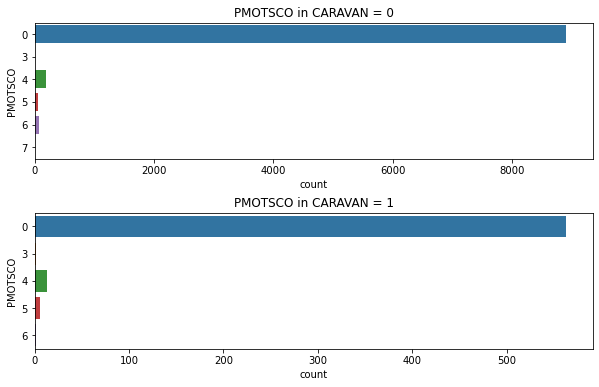

In [ ]:
#49
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="PMOTSCO", data = data0)
plt.title("PMOTSCO in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="PMOTSCO", data = data1)
plt.title("PMOTSCO in CARAVAN = 1")

Text(0.5, 1.0, 'PVRAAUT in CARAVAN = 1')

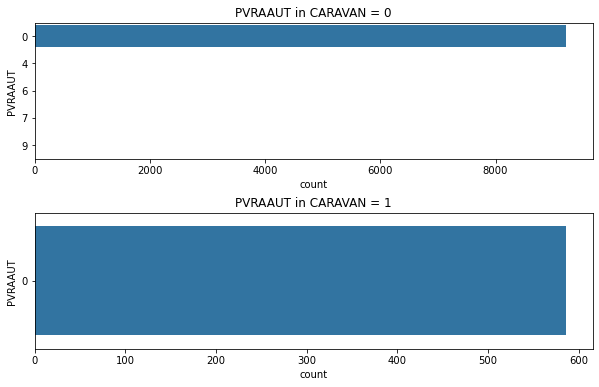

In [ ]:
#50
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="PVRAAUT", data = data0)
plt.title("PVRAAUT in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="PVRAAUT", data = data1)
plt.title("PVRAAUT in CARAVAN = 1")

Text(0.5, 1.0, 'PAANHANG in CARAVAN = 1')

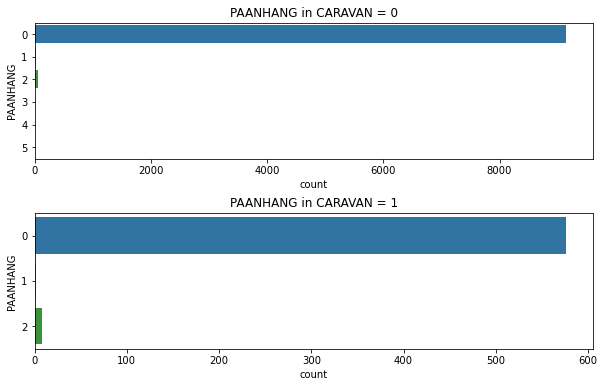

In [ ]:
#51
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="PAANHANG", data = data0)
plt.title("PAANHANG in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="PAANHANG", data = data1)
plt.title("PAANHANG in CARAVAN = 1")

Text(0.5, 1.0, 'PTRACTOR in CARAVAN = 1')

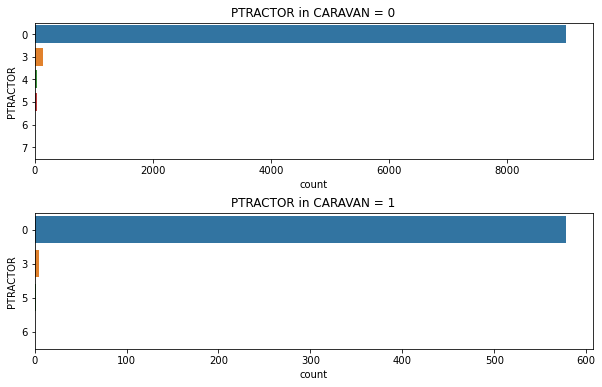

In [ ]:
#52
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="PTRACTOR", data = data0)
plt.title("PTRACTOR in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="PTRACTOR", data = data1)
plt.title("PTRACTOR in CARAVAN = 1")

Text(0.5, 1.0, 'PWERKT in CARAVAN = 1')

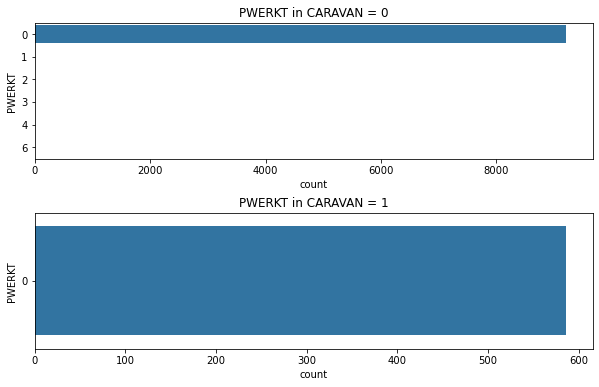

In [ ]:
#53
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="PWERKT", data = data0)
plt.title("PWERKT in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="PWERKT", data = data1)
plt.title("PWERKT in CARAVAN = 1")

Text(0.5, 1.0, 'PBROM in CARAVAN = 1')

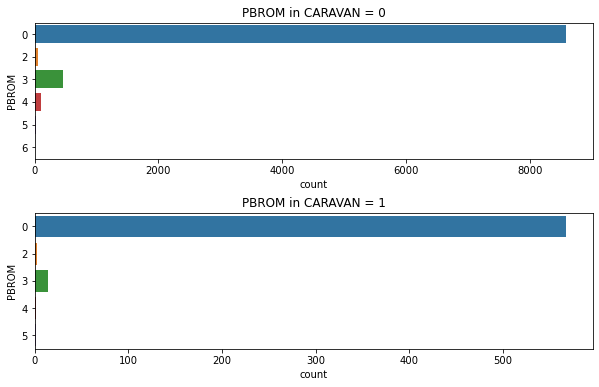

In [ ]:
#54
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="PBROM", data = data0)
plt.title("PBROM in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="PBROM", data = data1)
plt.title("PBROM in CARAVAN = 1")

Text(0.5, 1.0, 'PLEVEN in CARAVAN = 1')

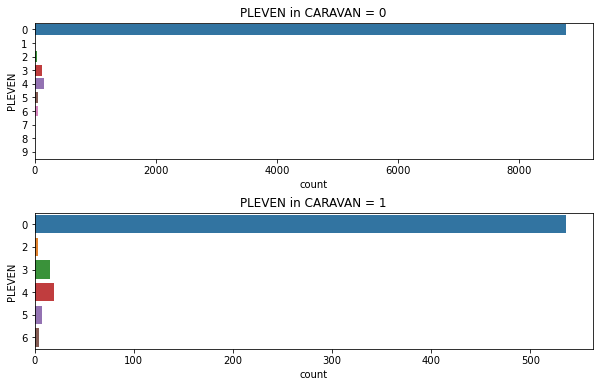

In [ ]:
#55
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="PLEVEN", data = data0)
plt.title("PLEVEN in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="PLEVEN", data = data1)
plt.title("PLEVEN in CARAVAN = 1")

Text(0.5, 1.0, 'PPERSONG in CARAVAN = 1')

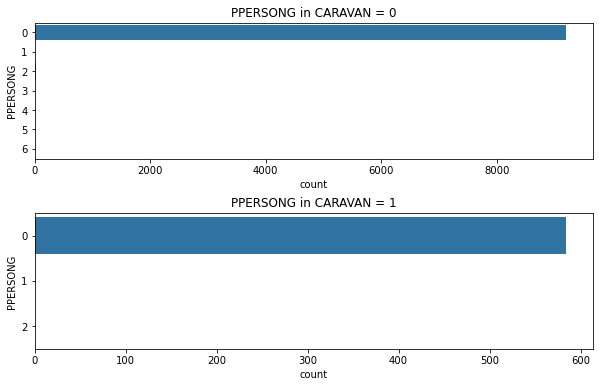

In [ ]:
#56
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="PPERSONG", data = data0)
plt.title("PPERSONG in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="PPERSONG", data = data1)
plt.title("PPERSONG in CARAVAN = 1")

Text(0.5, 1.0, 'PGEZONG in CARAVAN = 1')

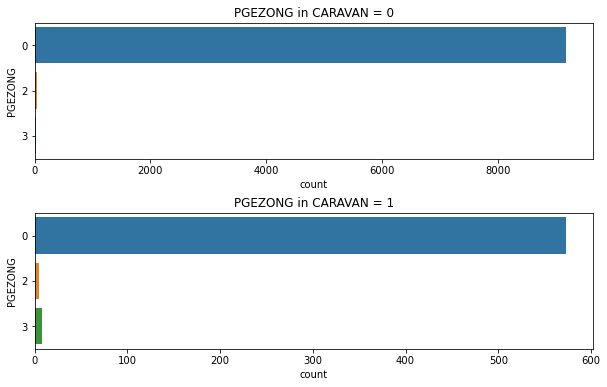

In [ ]:
#57
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="PGEZONG", data = data0)
plt.title("PGEZONG in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="PGEZONG", data = data1)
plt.title("PGEZONG in CARAVAN = 1")

Text(0.5, 1.0, 'PWAOREG in CARAVAN = 1')

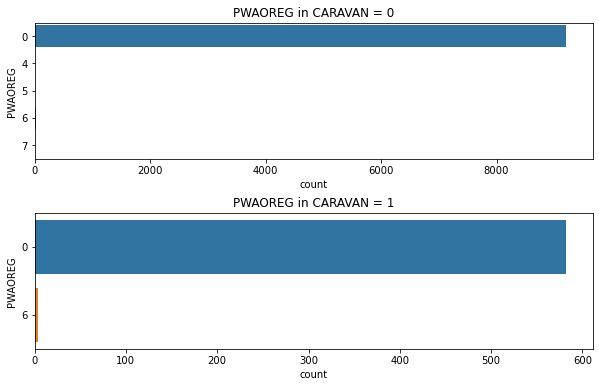

In [ ]:
#58
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="PWAOREG", data = data0)
plt.title("PWAOREG in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="PWAOREG", data = data1)
plt.title("PWAOREG in CARAVAN = 1")

Text(0.5, 1.0, 'PBRAND in CARAVAN = 1')

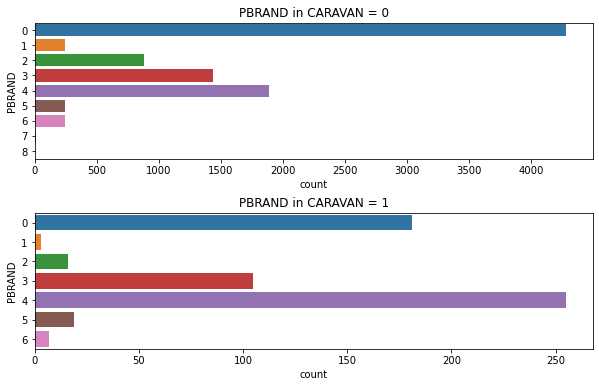

In [ ]:
#59
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="PBRAND", data = data0)
plt.title("PBRAND in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="PBRAND", data = data1)
plt.title("PBRAND in CARAVAN = 1")

Text(0.5, 1.0, 'PZEILPL in CARAVAN = 1')

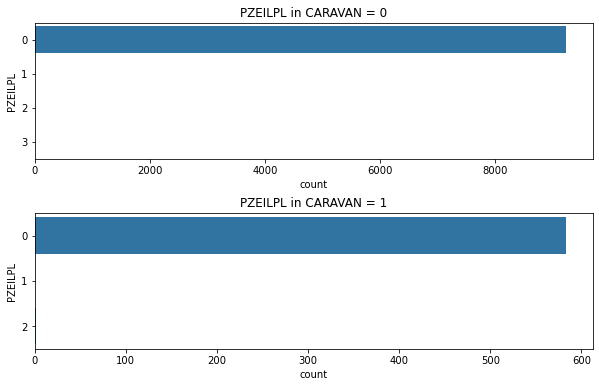

In [ ]:
#60
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="PZEILPL", data = data0)
plt.title("PZEILPL in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="PZEILPL", data = data1)
plt.title("PZEILPL in CARAVAN = 1")

Text(0.5, 1.0, 'PPLEZIER in CARAVAN = 1')

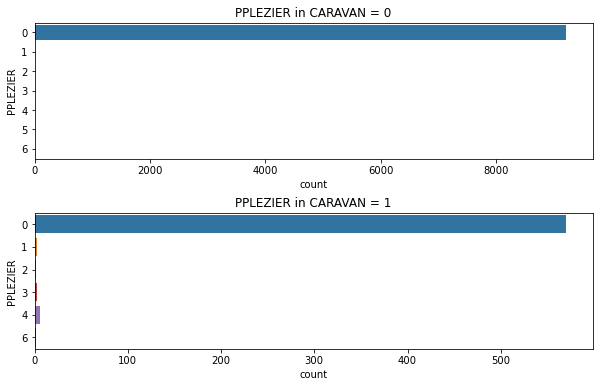

In [ ]:
#61
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="PPLEZIER", data = data0)
plt.title("PPLEZIER in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="PPLEZIER", data = data1)
plt.title("PPLEZIER in CARAVAN = 1")

Text(0.5, 1.0, 'PFIETS in CARAVAN = 1')

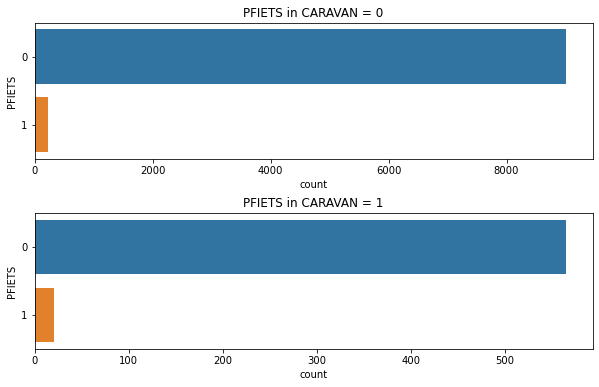

In [ ]:
#62
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="PFIETS", data = data0)
plt.title("PFIETS in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="PFIETS", data = data1)
plt.title("PFIETS in CARAVAN = 1")

Text(0.5, 1.0, 'PINBOED in CARAVAN = 1')

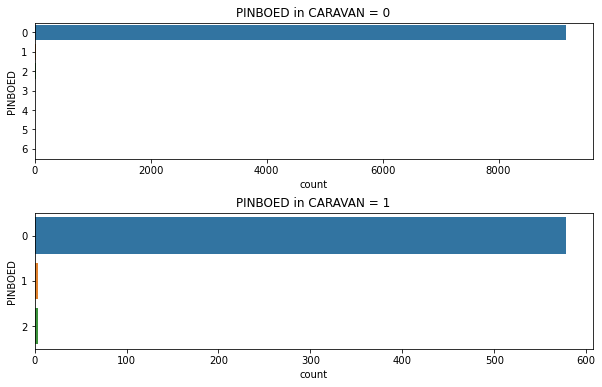

In [ ]:
#63
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="PINBOED", data = data0)
plt.title("PINBOED in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="PINBOED", data = data1)
plt.title("PINBOED in CARAVAN = 1")

Text(0.5, 1.0, 'PBYSTAND in CARAVAN = 1')

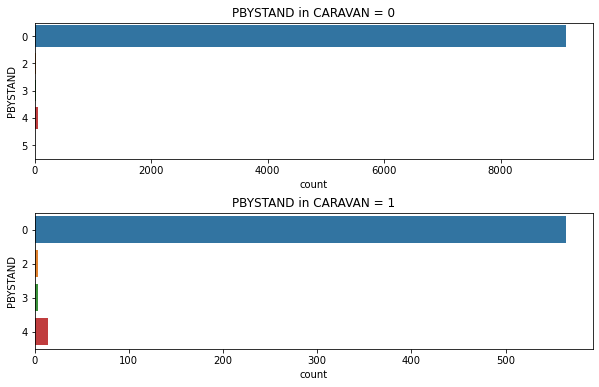

In [ ]:
#64
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="PBYSTAND", data = data0)
plt.title("PBYSTAND in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="PBYSTAND", data = data1)
plt.title("PBYSTAND in CARAVAN = 1")

In [ ]:
data65 = data.iloc[:,64:]

In [ ]:
data00 = data65[data65['CARAVAN'] == 0]
data11 = data65[data65['CARAVAN'] == 1]

In [ ]:
data00

,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9816,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9817,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9819,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9820,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'AWAPART in CARAVAN = 1')

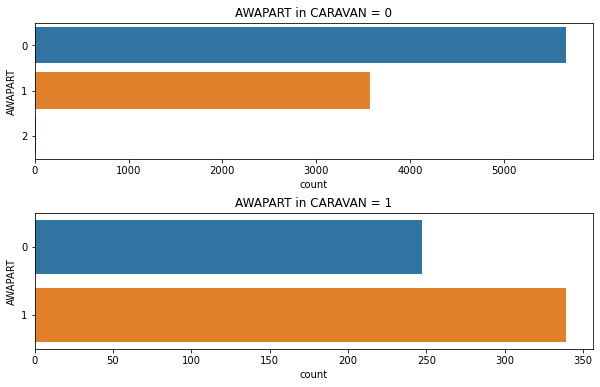

In [ ]:
#65
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="AWAPART", data = data00)
plt.title("AWAPART in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="AWAPART", data = data11)
plt.title("AWAPART in CARAVAN = 1")

Text(0.5, 1.0, 'AWABEDR in CARAVAN = 1')

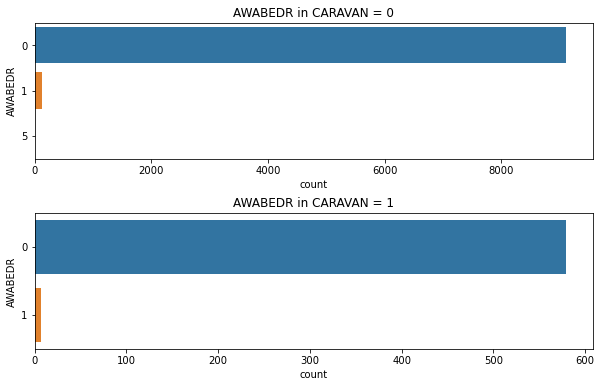

In [ ]:
#66
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="AWABEDR", data = data00)
plt.title("AWABEDR in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="AWABEDR", data = data11)
plt.title("AWABEDR in CARAVAN = 1")

Text(0.5, 1.0, 'AWALAND in CARAVAN = 1')

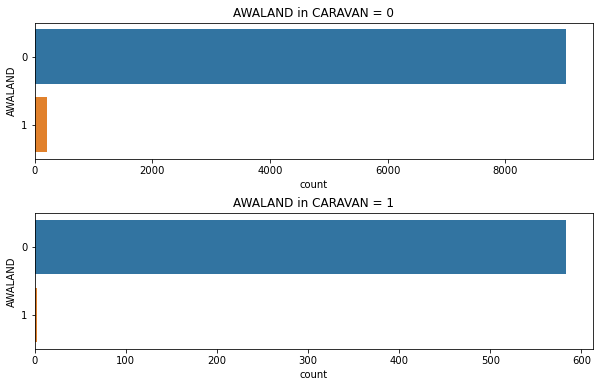

In [ ]:
#67
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="AWALAND", data = data00)
plt.title("AWALAND in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="AWALAND", data = data11)
plt.title("AWALAND in CARAVAN = 1")

Text(0.5, 1.0, 'APERSAUT in CARAVAN = 1')

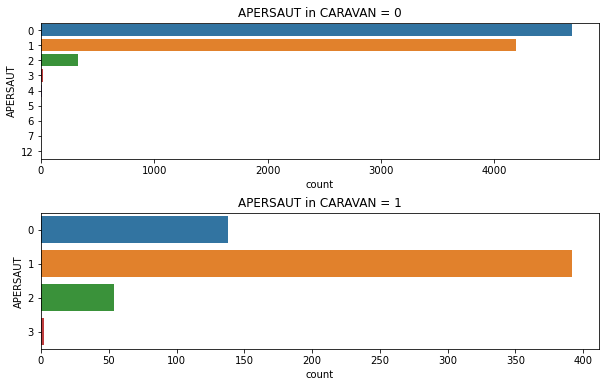

In [ ]:
#68
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="APERSAUT", data = data00)
plt.title("APERSAUT in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="APERSAUT", data = data11)
plt.title("APERSAUT in CARAVAN = 1")

Text(0.5, 1.0, 'ABESAUT in CARAVAN = 1')

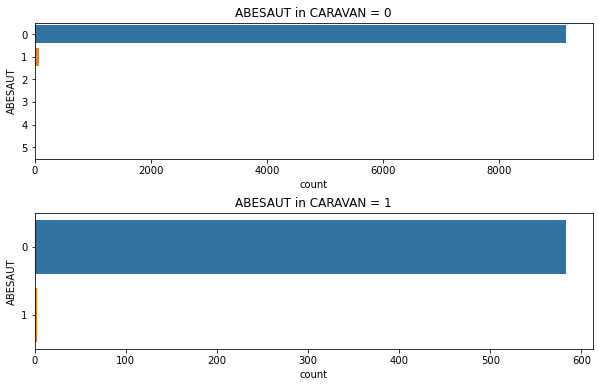

In [ ]:
#69
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="ABESAUT", data = data00)
plt.title("ABESAUT in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="ABESAUT", data = data11)
plt.title("ABESAUT in CARAVAN = 1")

Text(0.5, 1.0, 'AMOTSCO in CARAVAN = 1')

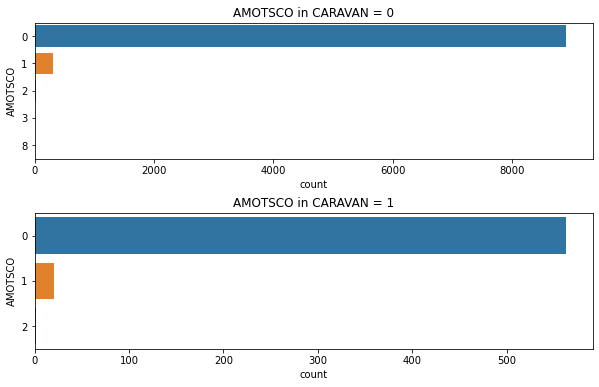

In [ ]:
#70
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="AMOTSCO", data = data00)
plt.title("AMOTSCO in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="AMOTSCO", data = data11)
plt.title("AMOTSCO in CARAVAN = 1")

Text(0.5, 1.0, 'AVRAAUT in CARAVAN = 1')

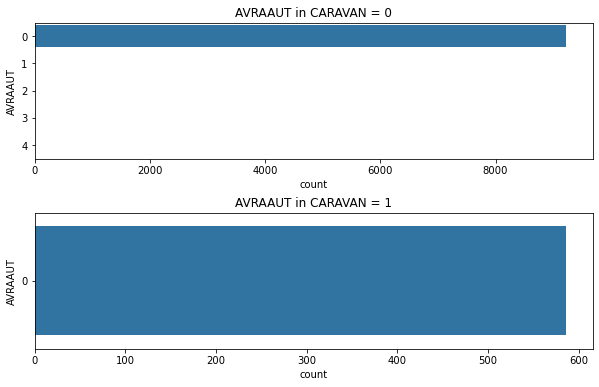

In [ ]:
#71
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="AVRAAUT", data = data00)
plt.title("AVRAAUT in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="AVRAAUT", data = data11)
plt.title("AVRAAUT in CARAVAN = 1")

Text(0.5, 1.0, 'AAANHANG in CARAVAN = 1')

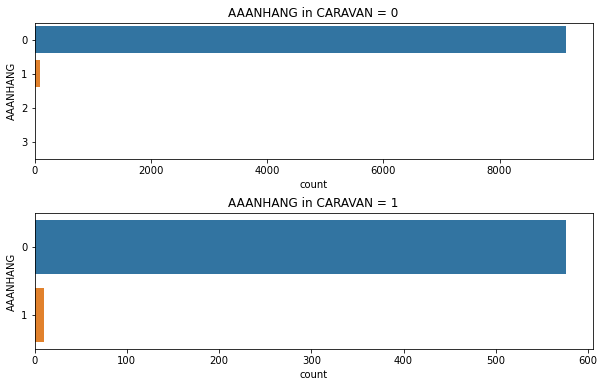

In [ ]:
#72
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="AAANHANG", data = data00)
plt.title("AAANHANG in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="AAANHANG", data = data11)
plt.title("AAANHANG in CARAVAN = 1")

Text(0.5, 1.0, 'ATRACTOR in CARAVAN = 1')

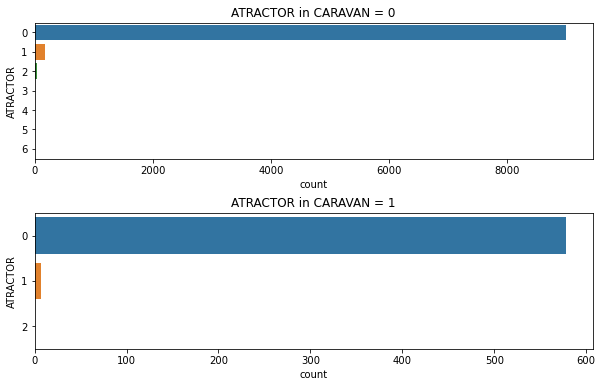

In [ ]:
#73
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="ATRACTOR", data = data00)
plt.title("ATRACTOR in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="ATRACTOR", data = data11)
plt.title("ATRACTOR in CARAVAN = 1")

Text(0.5, 1.0, 'AWERKT in CARAVAN = 1')

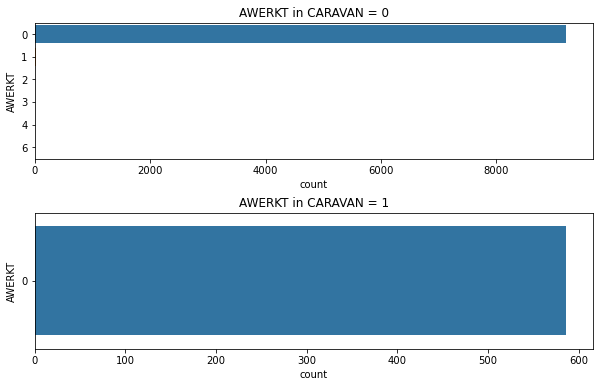

In [ ]:
#74
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="AWERKT", data = data00)
plt.title("AWERKT in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="AWERKT", data = data11)
plt.title("AWERKT in CARAVAN = 1")

Text(0.5, 1.0, 'ABROM in CARAVAN = 1')

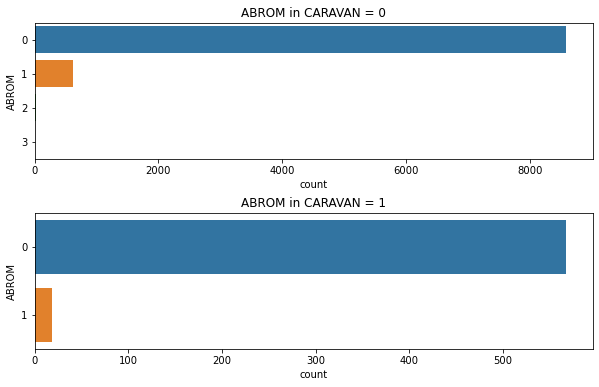

In [ ]:
#75
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="ABROM", data = data00)
plt.title("ABROM in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="ABROM", data = data11)
plt.title("ABROM in CARAVAN = 1")

Text(0.5, 1.0, 'ALEVEN in CARAVAN = 1')

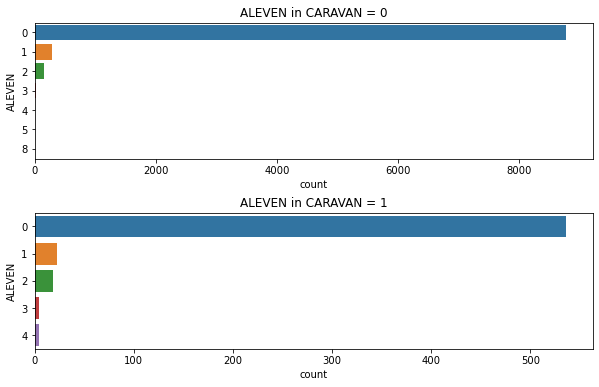

In [ ]:
#76
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="ALEVEN", data = data00)
plt.title("ALEVEN in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="ALEVEN", data = data11)
plt.title("ALEVEN in CARAVAN = 1")

Text(0.5, 1.0, 'APERSONG in CARAVAN = 1')

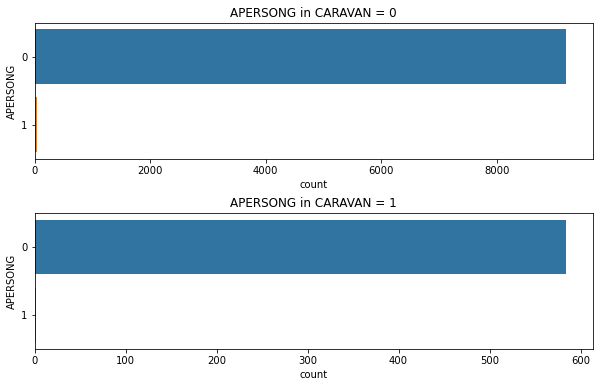

In [ ]:
#77
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="APERSONG", data = data00)
plt.title("APERSONG in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="APERSONG", data = data11)
plt.title("APERSONG in CARAVAN = 1")

Text(0.5, 1.0, 'AGEZONG in CARAVAN = 1')

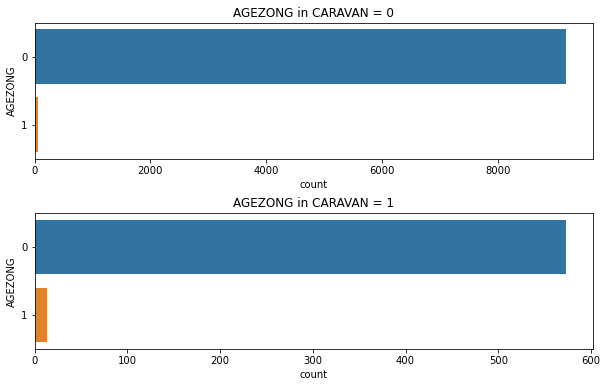

In [ ]:
#78
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="AGEZONG", data = data00)
plt.title("AGEZONG in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="AGEZONG", data = data11)
plt.title("AGEZONG in CARAVAN = 1")

Text(0.5, 1.0, 'AWAOREG in CARAVAN = 1')

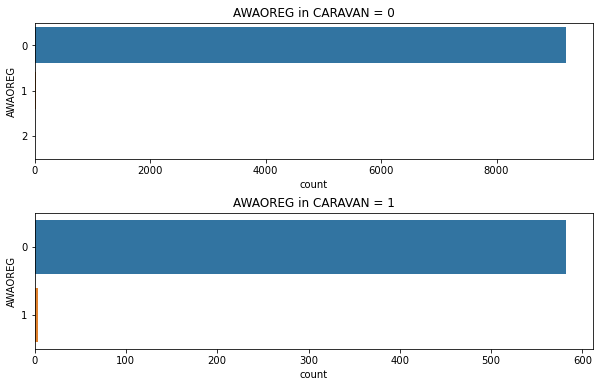

In [ ]:
#79
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="AWAOREG", data = data00)
plt.title("AWAOREG in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="AWAOREG", data = data11)
plt.title("AWAOREG in CARAVAN = 1")

Text(0.5, 1.0, 'ABRAND in CARAVAN = 1')

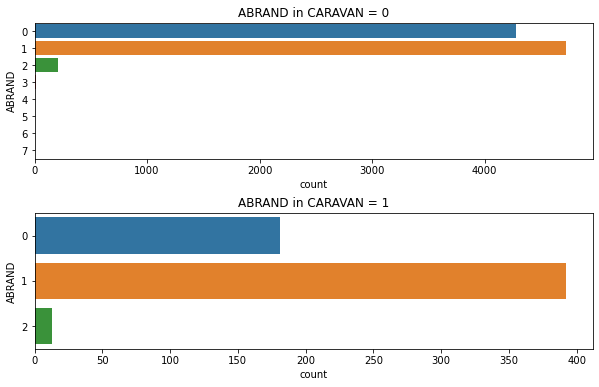

In [ ]:
#80
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="ABRAND", data = data00)
plt.title("ABRAND in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="ABRAND", data = data11)
plt.title("ABRAND in CARAVAN = 1")

Text(0.5, 1.0, 'AZEILPL in CARAVAN = 1')

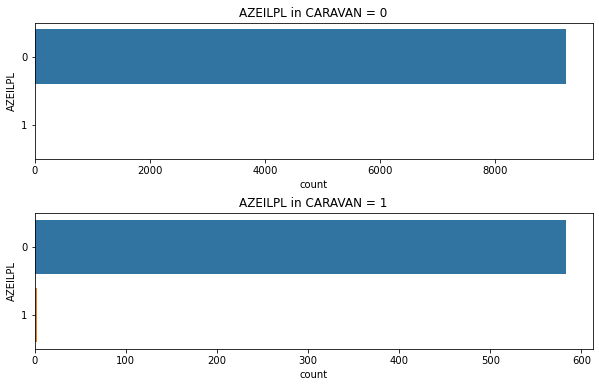

In [ ]:
#81
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="AZEILPL", data = data00)
plt.title("AZEILPL in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="AZEILPL", data = data11)
plt.title("AZEILPL in CARAVAN = 1")

Text(0.5, 1.0, 'APLEZIER in CARAVAN = 1')

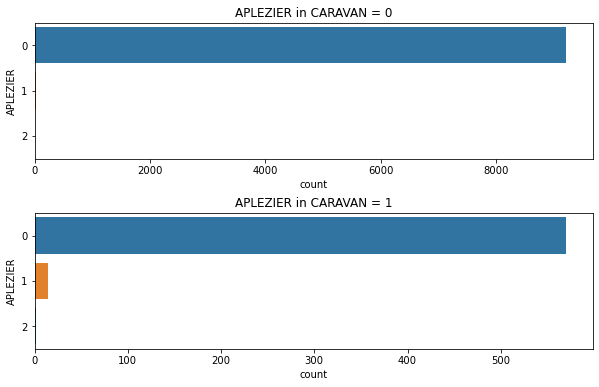

In [ ]:
#82
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="APLEZIER", data = data00)
plt.title("APLEZIER in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="APLEZIER", data = data11)
plt.title("APLEZIER in CARAVAN = 1")

Text(0.5, 1.0, 'AFIETS in CARAVAN = 1')

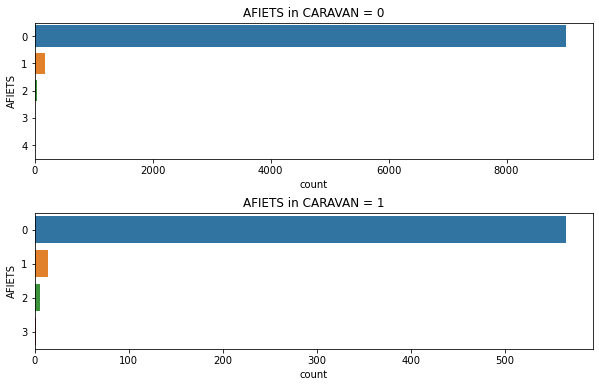

In [ ]:
#83
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="AFIETS", data = data00)
plt.title("AFIETS in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="AFIETS", data = data11)
plt.title("AFIETS in CARAVAN = 1")

Text(0.5, 1.0, 'AFIETS in CARAVAN = 1')

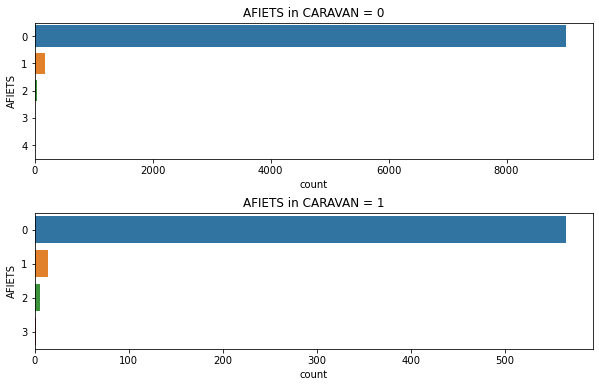

In [ ]:
#84
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="AFIETS", data = data00)
plt.title("AFIETS in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="AFIETS", data = data11)
plt.title("AFIETS in CARAVAN = 1")

Text(0.5, 1.0, 'ABYSTAND in CARAVAN = 1')

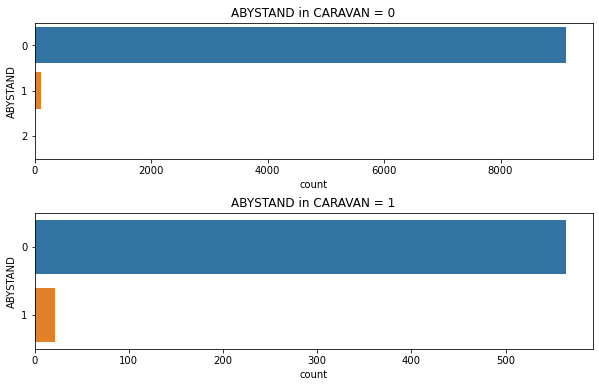

In [ ]:
#85
plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace = 0.4)
plt.subplot(211)
sns.countplot(y="ABYSTAND", data = data00)
plt.title("ABYSTAND in CARAVAN = 0")
plt.subplot(212)
sns.countplot(y="ABYSTAND", data = data11)
plt.title("ABYSTAND in CARAVAN = 1")

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
data.corr()

NameError: name 'data' is not defined

In [ ]:
#sns.barplot(x = "PWALAND", y = "CARAVAN", data = data45, ci = None)
#sns.countplot(y="PWAPART", data = data1)